## Assignment 4

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [1]:
#required imports
import numpy as np
import pandas as pd

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [2]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
dataset.columns = dataset.iloc[0]
dataset.drop(['ID'], inplace=True)

In the following, you can take a look into the dataset.

In [3]:
dataset.head(10)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [66]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from IPython.display import SVG
from graphviz import Source
from sklearn import tree

In [67]:
df=dataset
y = df['default payment next month'].values.astype('int')
X = df.drop(columns='default payment next month').values.astype('int')

## Entropy Descison Tree Classification

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Build Decision tree classifier with matx_Depth=5 and criterion=entropy
tree_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
#predict
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(cm) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred) )
print ('Report : ')
print (classification_report(y_test,y_pred) )


Confusion Matrix :
[[5608  260]
 [1075  557]]
Accuracy Score : 0.822
Report : 
             precision    recall  f1-score   support

          0       0.84      0.96      0.89      5868
          1       0.68      0.34      0.45      1632

avg / total       0.80      0.82      0.80      7500



## Gini impurity Decsion tree Classification

In [71]:
# Build Decision tree classifier with matx_Depth=5 and criterion=gini
tree_clf = DecisionTreeClassifier(max_depth=5, criterion='gini')
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
#predict
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(cm) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred) )
print ('Report : ')
print (classification_report(y_test,y_pred) )


Confusion Matrix :
[[5608  260]
 [1073  559]]
Accuracy Score : 0.8222666666666667
Report : 
             precision    recall  f1-score   support

          0       0.84      0.96      0.89      5868
          1       0.68      0.34      0.46      1632

avg / total       0.81      0.82      0.80      7500



### compare with two different criterions, Gini have a little better accuracy than Entropy

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomGrid search over hyper-parameters. Compare the results.

In [98]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
parameters={'criterion':('gini','entropy'),'min_samples_split' : range(10,500,20),'max_depth': range(1,10,1)}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)


In [99]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
#predict
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(cm) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred) )
print ('Report : ')
print (classification_report(y_test,y_pred) )

Confusion Matrix :
[[5594  274]
 [1051  581]]
Accuracy Score : 0.8233333333333334
Report : 
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      5868
          1       0.68      0.36      0.47      1632

avg / total       0.81      0.82      0.80      7500



#### After search over hyper-parameters(criterion,min_samples_spilit,max_Depth), we got a better score for 0.8233 which is better than previous 0.8223, which improved a little bit.

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [92]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X :X_Train

    y : y_Train

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

AdaBoostClassifier 0.8212
ExtraTreesClassifier 0.8030666666666667
RandomForestClassifier 0.8090666666666667
GradientBoostingClassifier 0.8258666666666666


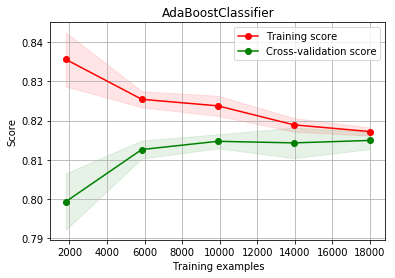

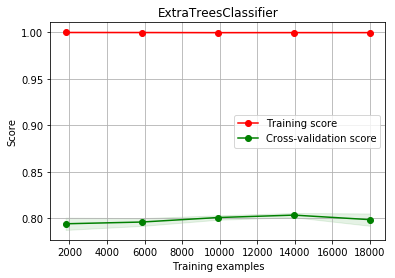

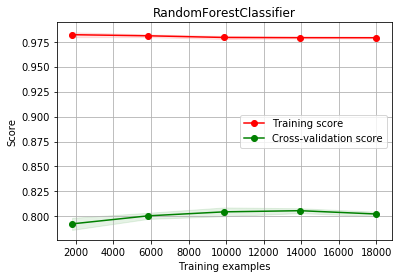

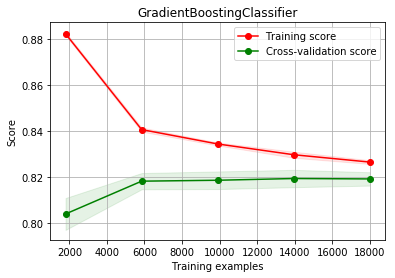

In [95]:
# YOUR CODE HERE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve

abc_clf = AdaBoostClassifier()
etc_clf = ExtraTreesClassifier()
rfc_clf = RandomForestClassifier()
gbr_clf = GradientBoostingClassifier()
for clf in (abc_clf, etc_clf, rfc_clf,gbr_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test);
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred));
    plot_learning_curve(clf, clf.__class__.__name__, X_train, y_train, ylim=None, cv=5, n_jobs=4)

plt.show()

### Comparison:
#### Among 4 classifiers, ExtraTrees and Random Forest have lowest accuracy around 80% with high variance.
#### Gradient Boosting and Adaboost has the two highest accuracy (0.8259,0.8212), and validation curves are very close together after sample #### #### increase;but AdaBoost is more high-bias model than GradientBoosting.

#### So the best model here is Gradient Boosting

#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

#### How does changing hyperparms effect model performance?
By optimize the best parameters of a model, this will improve the performance of this model, but in a limitation of this model.

#### Why do you think certain models performed better/worse?
A better model has a higher accuracy score and low variance, a worse model has a lower accuracy score and high variance. A good model will not overfit the training data.



#### How does this performance line up with known strengths/weakness of these models?

RF and ET have the similiar accuracy with high variance, in contrast to RandomForest which tests random splits, ExtraTrees tests all possible splits over fraction of features, which will result a higher accuracy even a little bit.

AdaBoost and GradientBoost have the similiar accuracy with low variance, but Gradient Boosting is a generic algorithm to find approximate solutions to the additive modeling problem, while AdaBoost can be seen as a special case with a particular loss function. So the stength of AdaBoost model is less run time, GradientBoost model takes more run time but has a better score ;  